In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import csv
import pylab
from scipy.interpolate import interp1d


np.set_printoptions(threshold=sys.maxsize)


In [2]:
def calculateConvergenceOrder(a):
    n = a.shape[0]
    for k in range(2,n-1):
        q = np.log(abs((a[k+1]-a[k])/(a[k]-a[k-1]))) / np.log(abs((a[k]-a[k-1])/(a[k-1]-a[k-2])))
        print("convergence rate: ",q)

Convergence rate for 5 elements: 
Analytic solution
convergence rate:  1.3072626692897054
convergence rate:  1.8022718718766437
convergence rate:  1.9897874714254762
convergence rate:  2.0000148568341993
convergence rate:  2.8887990778507944
Broyden solution
convergence rate:  0.36066526447185543
convergence rate:  2.162405271346793
convergence rate:  1.076712721390694
convergence rate:  1.0268394767812794
convergence rate:  0.6854046391847648
convergence rate:  1.6957758153891347
convergence rate:  1.9545487218727806
convergence rate:  0.770443368658973
convergence rate:  0.9449252867375761
convergence rate:  0.8677278977025809
convergence rate:  1.5109558895524087
convergence rate:  0.272423159007497
convergence rate:  -1.609739428890193
convergence rate:  -2.3126934021810395
convergence rate:  3.2438805851863917
convergence rate:  0.2969380218830908
convergence rate:  0.6809367111727461
convergence rate:  1.4910915338083128
Convergence rate for 40 elements: 
Analytic solution
conver

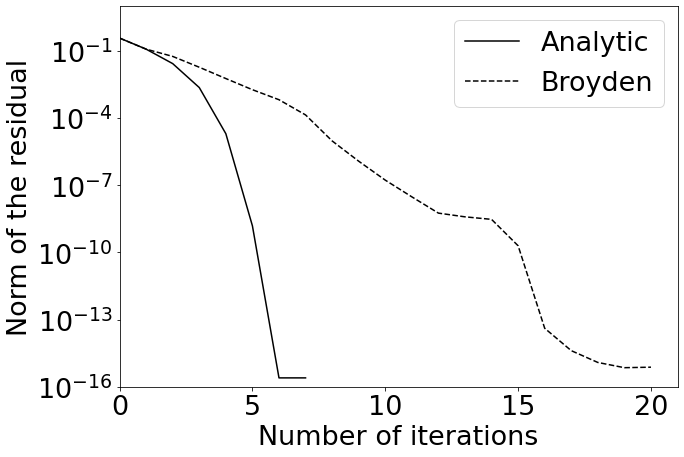

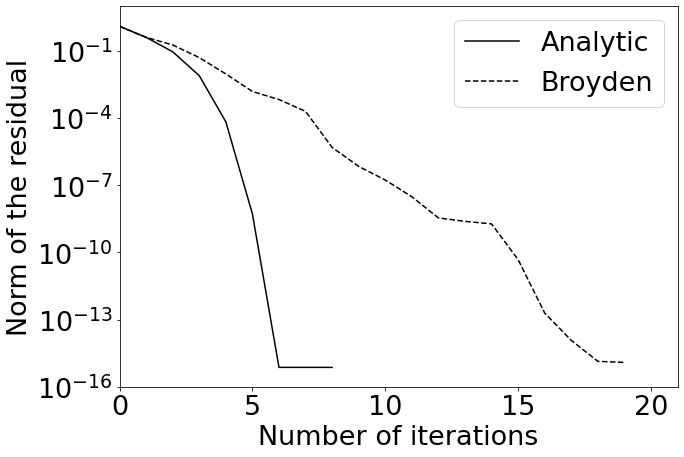

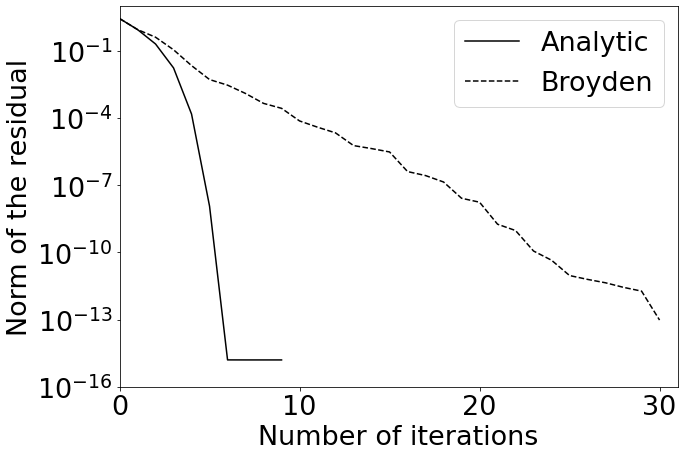

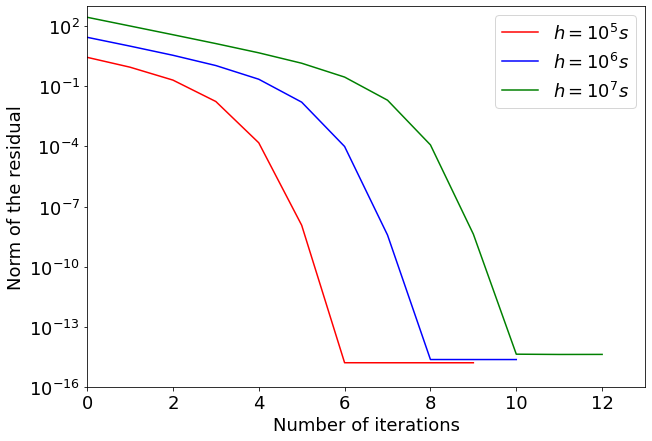

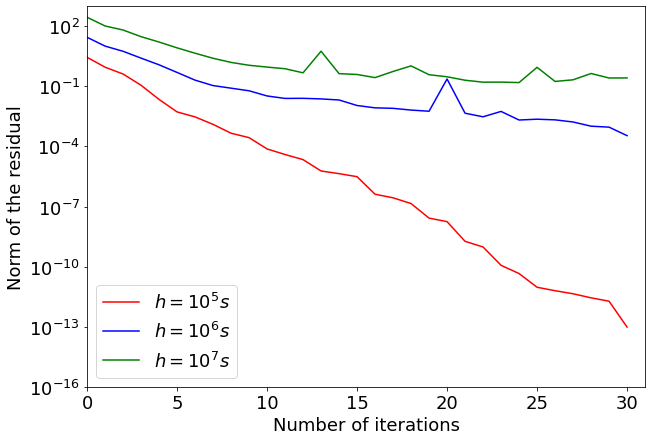

In [17]:
#dt=1e5
direct5elem_dt1e5 = np.array([0.38017, 0.12156, 0.0274462, 0.00234032, 2.03011e-05, 1.55398e-09, 2.50237e-16, 2.50235e-16])
direct5elem_dt1e6 = np.array([3.8017, 1.3777, 0.479255, 0.146311, 0.0302531, 0.00217279, 1.32836e-05, 5.03516e-10, 3.95217e-16, 3.95204e-16])
direct5elem_dt1e7 = np.array([38.0168, 13.9634, 5.10682, 1.84119, 0.634545, 0.190945, 0.038768, 0.00272015, 1.59503e-05, 5.56294e-10, 5.38034e-16, 5.02693e-16])

Broyden5elem_dt1e5 = np.array([0.38017, 0.12156, 0.0575754, 0.0189114, 0.00590251, 0.00187642, 0.000669007, 0.000140111, 9.65648e-06, 1.19849e-06, 1.7087e-07, 3.06483e-08, 5.74737e-09, 3.91888e-09, 3.02118e-09, 1.9969e-10, 4.11933e-14, 4.11524e-15, 1.22325e-15, 7.14185e-16, 7.52367e-16])
Broyden5elem_dt1e6 = np.array([3.8017, 1.3777, 0.76803, 0.370762, 0.200956, 0.122017, 0.0882862, 0.0655807, 0.0311232, 0.0228628, 0.0447721, 0.0281088, 21457.2, 0.0280228, 0.0279996, 0.0283096, 0.0282051, 0.0311058, 0.0280247, 0.0281872, 0.0282459])
Broyden5elem_dt1e7 = np.array([38.0168, 13.9634, 8.55838, 4.051, 2.23245, 1.2783, 0.837002, 0.616008, 0.478267, 0.339183, 0.16127, 0.220171, 0.228006])

direct40elem_dt1e5 = np.array([1.27208, 0.409339, 0.092952, 0.00793621, 6.88443e-05, 5.26979e-09, 7.38344e-16, 7.38336e-16, 7.38341e-16])
direct40elem_dt1e6 = np.array([12.7208, 4.61492, 1.61029, 0.494067, 0.102535, 0.00736822, 4.50465e-05, 1.70748e-09, 1.11632e-15, 1.11935e-15])
direct40elem_dt1e7 = np.array([127.207, 46.7274, 17.0972, 6.17258, 2.13408, 0.645207, 0.131413, 0.00922439, 5.40893e-05, 1.88642e-09, 1.51174e-15, 1.50873e-15, 1.51209e-15])
                               
Broyden40elem_dt1e5 = np.array([1.27208, 0.409339, 0.186577, 0.0510541, 0.00949026, 0.00156023, 0.000681147, 0.000201475, 4.95747e-06, 7.04211e-07, 1.73166e-07, 3.10338e-08, 3.4951e-09, 2.46645e-09, 1.89555e-09, 4.80718e-11, 1.9731e-13, 1.18745e-14, 1.37281e-15, 1.22721e-15])
Broyden40elem_dt1e6 = np.array([12.7208, 4.61492, 2.54308, 1.15908, 0.536858, 0.223573, 0.0928167, 0.0495175, 0.0354333, 0.0235449, 0.0108454, 0.00908488, 0.0090643])
Broyden40elem_dt1e7 = np.array([127.207, 46.7274, 29.3594, 13.6453, 7.40507, 3.81087, 2.06438, 1.16212, 0.722908, 0.506931, 0.38219, 0.277809, 0.188491, 0.171415, 0.184405])

direct200elem_dt1e5 = np.array([2.83062, 0.910406, 0.206491, 0.0176063, 0.000152624, 1.16808e-08, 1.59141e-15, 1.58562e-15, 1.58514e-15, 1.58558e-15])
direct200elem_dt1e6 = np.array([28.3062, 10.2685, 3.58226, 1.09843, 0.227693, 0.0163427, 9.9859e-05, 3.78472e-09, 2.29901e-15, 2.29509e-15, 2.2954e-15])
direct200elem_dt1e7 = np.array([283.078, 103.983, 38.0458, 13.7346, 4.74736, 1.43435, 0.291795, 0.0204585, 0.000119903, 4.18133e-09, 4.25017e-15, 4.1209e-15, 4.14323e-15])

Broyden200elem_dt1e5 = np.array([2.83062, 0.910406, 0.414754, 0.113897, 0.0223394, 0.00532652, 0.00299375, 0.00127158, 0.000458845, 0.000276104, 7.53379e-05, 3.96505e-05, 2.20443e-05, 5.97215e-06, 4.39102e-06, 3.10569e-06, 4.12724e-07, 2.73402e-07, 1.41198e-07, 2.64825e-08, 1.76473e-08, 1.83506e-09, 9.57805e-10, 1.1628e-10, 4.51809e-11, 9.34074e-12, 6.28743e-12, 4.42824e-12, 2.76755e-12, 1.88104e-12, 9.58656e-14])
Broyden200elem_dt1e6 = np.array([28.3062, 10.2685, 5.65774, 2.57945, 1.19582, 0.497622, 0.205037, 0.10979, 0.081434, 0.0603472, 0.0332801, 0.0250625, 0.0253717, 0.0237156, 0.0209476, 0.0111175, 0.00849093, 0.00802731, 0.00656652, 0.00575207, 0.234393, 0.00458189, 0.00303089, 0.00562636, 0.00209288, 0.00229882, 0.00213273, 0.0016696, 0.00103081, 0.000922377, 0.000347142])
Broyden200elem_dt1e7 = np.array([283.078, 103.983, 65.3482, 30.3479, 16.3984, 8.40506, 4.52671, 2.53645, 1.57623, 1.13271, 0.921529, 0.761417, 0.476116, 5.70383, 0.433177, 0.393533, 0.274409, 0.556357, 1.05578, 0.382283, 0.302205, 0.203147, 0.162185, 0.163564, 0.155093, 0.895118, 0.176884, 0.213024, 0.440299, 0.262469, 0.264118])

print("Convergence rate for 5 elements: ")
print("Analytic solution")
calculateConvergenceOrder(direct5elem_dt1e5)
print("Broyden solution")
calculateConvergenceOrder(Broyden5elem_dt1e5)
print("Convergence rate for 40 elements: ")
print("Analytic solution")
calculateConvergenceOrder(direct40elem_dt1e5)
print("Broyden solution")
calculateConvergenceOrder(Broyden40elem_dt1e5)
print("Convergence rate for 200 elements: ")
print("Analytic solution")
calculateConvergenceOrder(direct200elem_dt1e5)
print("Broyden solution")
calculateConvergenceOrder(Broyden200elem_dt1e5)


# constant timestep size dt=1e5, varying problem sizes 
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})
plt.plot(direct5elem_dt1e5,'-k', label = "Analytic")
plt.plot(Broyden5elem_dt1e5,'--k', label = "Broyden")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of the residual")
plt.yscale('log')
plt.ylim(1e-16, 1e1)
plt.xlim(0, 21)
plt.legend()
plt.savefig('../results/NewtonIterationConvergence5Elements.png', format='png',dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})
plt.plot(direct40elem_dt1e5,'-k', label = "Analytic")
plt.plot(Broyden40elem_dt1e5,'--k', label = "Broyden")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of the residual")
plt.yscale('log')
plt.ylim(1e-16, 1e1)
plt.xlim(0, 21)
plt.legend()
plt.savefig('../results/NewtonIterationConvergence40Elements.png', format='png',dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})
plt.plot(direct200elem_dt1e5,'-k', label = "Analytic")
plt.plot(Broyden200elem_dt1e5,'--k', label = "Broyden")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of the residual")
plt.yscale('log')
plt.ylim(1e-16, 1e1)
plt.xlim(0, 31)
plt.legend()
plt.savefig('../results/NewtonIterationConvergence200Elements.png', format='png',dpi=300, bbox_inches='tight')
plt.show()

# varying timestep sizes, constant problem size=200 fault elements
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 18})
plt.plot(direct200elem_dt1e5,'-r', label = r"$h=10^5s$")
plt.plot(direct200elem_dt1e6,'-b', label = r"$h=10^6s$")
plt.plot(direct200elem_dt1e7,'-g', label = r"$h=10^7s$")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of the residual")
plt.yscale('log')
plt.ylim(1e-16, 1e3)
plt.xlim(0, 13)
plt.legend()
plt.savefig('../results/NewtonIterationConvergence200Elements_DifferentDT_Analytic.png', format='png',dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 18})
plt.plot(Broyden200elem_dt1e5,'-r', label = r"$h=10^5s$")
plt.plot(Broyden200elem_dt1e6,'-b', label = r"$h=10^6s$")
plt.plot(Broyden200elem_dt1e7,'-g', label = r"$h=10^7s$")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of the residual")
plt.yscale('log')
plt.ylim(1e-16, 1e3)
plt.xlim(0, 31)
plt.legend()
plt.savefig('../results/NewtonIterationConvergence200Elements_DifferentDT_Broyden.png', format='png',dpi=300, bbox_inches='tight')
plt.show()
